# Classification on IRIS Dataset using SVM and XGBoost
#### Khushali Verma | Computer Science and Design Undergrad, IIIT-Delhi

## 1. Importing the Necessary Libraries and Dataset

### 1.1 Importing Libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
from mpl_toolkits.mplot3d import Axes3D
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.metrics import classification_report, confusion_matrix
import xgboost as xgb
from sklearn.metrics import precision_score

### 1.2 Loading the Dataset

In [2]:
iris = pd.read_csv('IRIS.csv')

In [3]:
iris.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


## 2. Understanding the Dataset

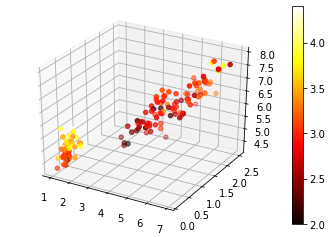

In [4]:
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')

x = np.array(iris['petal_length'])
y = np.array(iris['petal_width'])
z = np.array(iris['sepal_length'])
c = np.array(iris['sepal_width'])

img = ax.scatter(x, y, z, c=c, cmap=plt.hot())
fig.colorbar(img)
plt.show()

This gives us some idea that the features of two out of the three classes are somewhat similar, while they are substantially different for the third one. However, the 4D features visualized as color does not give much insights as of now.

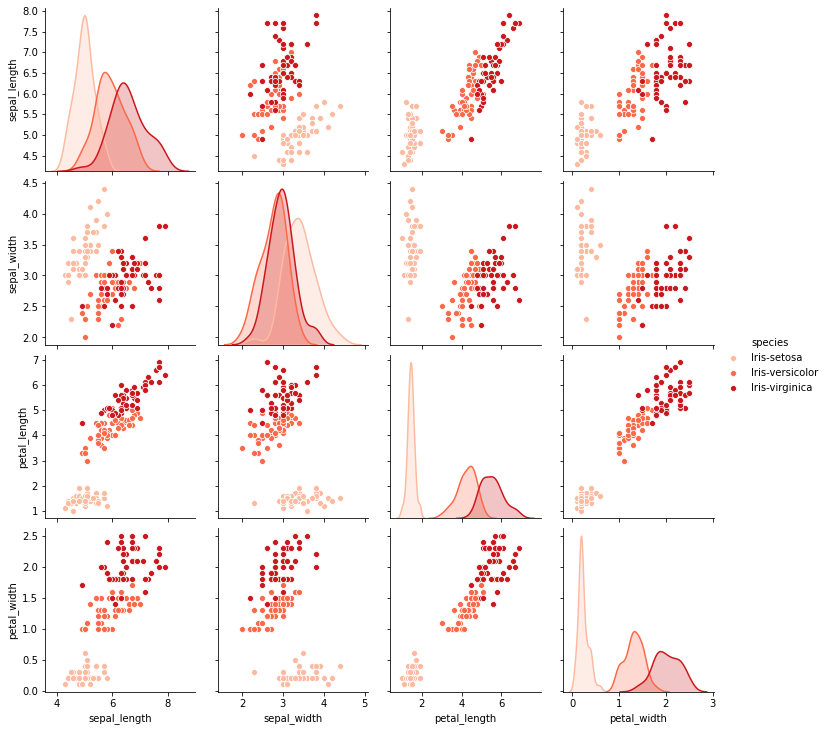

In [5]:
sns.pairplot(data=iris, hue='species', palette='Reds')

The petal length and the petal width give a more clear classification for each of the three kinds, as compared to the sepal length and sepal width.

## 3. Building the Models

### 3.1 Splitting the Data into Train and Test

In [6]:
x=iris.iloc[:,:-1]
y=iris.iloc[:,4]
x_train,x_test, y_train, y_test=train_test_split(x,y,test_size=0.30)

In [7]:
x_train.shape

(105, 4)

In [8]:
x_test.shape

(45, 4)

In [9]:
y_train.shape

(105,)

In [10]:
y_test.shape

(45,)

### 3.2 Support Vector Classifier

In [11]:
model=SVC()
model.fit(x_train, y_train)

SVC(C=1.0, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='scale', kernel='rbf',
    max_iter=-1, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=False)

#### Predicting the class

In [12]:
pred_svm = model.predict(x_test)

In [13]:
pred_svm[:10]

array(['Iris-virginica', 'Iris-virginica', 'Iris-versicolor',
       'Iris-virginica', 'Iris-setosa', 'Iris-setosa', 'Iris-setosa',
       'Iris-virginica', 'Iris-setosa', 'Iris-setosa'], dtype=object)

### 3.3 XGBoost Classifier

#### Numerizing the labels

In [14]:
Y_train = []
for label in y_train:
    if label=='Iris-setosa':
        Y_train.append(0)
    elif label=='Iris-versicolor':
        Y_train.append(1)
    else:
        Y_train.append(2)
        
data = np.array(Y_train)
Y_train = pd.Series(data)

In [15]:
Y_train.head()

0    0
1    1
2    1
3    2
4    1
dtype: int32

In [16]:
Y_test = []
for label in y_test:
    if label=='Iris-setosa':
        Y_test.append(0)
    elif label=='Iris-versicolor':
        Y_test.append(1)
    else:
        Y_test.append(2)
        
data = np.array(Y_test)
Y_test = pd.Series(data)

In [17]:
Y_test.head()

0    2
1    2
2    1
3    2
4    0
dtype: int32

#### Training the Model

In [18]:
dtrain = xgb.DMatrix(x_train, label=Y_train)
dtest = xgb.DMatrix(x_test, label=Y_test)

In [19]:
parameters = {
    'eta': 0.3, 'silent': True, 'objective': 'multi:softprob', 'num_class': 3, 'max_depth': 3
    }  
num_iter = 20

In [20]:
model = xgb.train(parameters, dtrain, num_iter)

[08:45:37] WARNING: C:\Users\Administrator\workspace\xgboost-win64_release_1.1.0\src\learner.cc:480: 
Parameters: { silent } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.




#### Prediciting the class

In [21]:
predictions = model.predict(dtest)

In [22]:
predictions[:10]

array([[0.00418668, 0.00684058, 0.9889727 ],
       [0.00418668, 0.00684058, 0.9889727 ],
       [0.00536439, 0.98103595, 0.01359967],
       [0.01059622, 0.03992827, 0.9494756 ],
       [0.98807216, 0.00812154, 0.00380627],
       [0.98807216, 0.00812154, 0.00380627],
       [0.98807216, 0.00812154, 0.00380627],
       [0.01017248, 0.03289586, 0.9569316 ],
       [0.98807216, 0.00812154, 0.00380627],
       [0.98807216, 0.00812154, 0.00380627]], dtype=float32)

In [23]:
pred_xgb = np.asarray([np.argmax(line) for line in predictions])

In [24]:
pred_xgb[:10]

array([2, 2, 1, 2, 0, 0, 0, 2, 0, 0], dtype=int64)

## 4. Evaluating the Models

### 4.1 Classification Report: Support Vector Classifier

In [25]:
print(classification_report(y_test, pred_svm))

                 precision    recall  f1-score   support

    Iris-setosa       1.00      1.00      1.00        15
Iris-versicolor       0.93      1.00      0.96        13
 Iris-virginica       1.00      0.94      0.97        17

       accuracy                           0.98        45
      macro avg       0.98      0.98      0.98        45
   weighted avg       0.98      0.98      0.98        45



### 4.2 Classification Report: XGBoost Classifier

In [26]:
print(classification_report(Y_test, pred_xgb))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        15
           1       0.93      1.00      0.96        13
           2       1.00      0.94      0.97        17

    accuracy                           0.98        45
   macro avg       0.98      0.98      0.98        45
weighted avg       0.98      0.98      0.98        45



Both the models give an accuracy of **98%**, classifying the 45 test set values as follows:
- 15/45 as Iris-setosa
- 13/45 as Iris-versicolor
- 17/45 as Iris-virginica